# 14 - QAOA Benchmark

This notebook will provide an overview of QAOA Benchmarks.

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create a problem instance
We begin by creating a problem instance for a simple MaximumCut problem for a random graph created using the `random_instance` method of the class.

In [14]:
from openqaoa.problems import MaximumCut

# Use the MinimumVertexCover class to instantiate the problem, and get the QUBO representation of the problem
prob = MaximumCut.random_instance(n_nodes=7, edge_probability=0.9, seed=10)
qubo = prob.qubo

## Create a QAOA object with the device to benchmark

In [15]:
qpu_credentials ={
    "hub": "ibm-q",
    "group": "open", 
    "project": "main"
}

In [16]:
from openqaoa import QAOA, create_device

# create the QAOA object
q = QAOA()

# set device and backend properties
qiskit_cloud = create_device(location='ibmq', name='ibm_oslo', **qpu_credentials, as_emulator=True)
q.set_device(qiskit_cloud)
q.set_backend_properties(n_shots=1000)

# set properties
q.set_circuit_properties(p=1, param_type='standard')

# compile with the problem
q.compile(qubo)

## Benchmark

In [17]:
from openqaoa.algorithms.qaoa import QAOABenchmark

# create the QAOABenchmark object, passing the QAOA object to benchmark as an argument
benchmark = QAOABenchmark(q)

Plotting the main plot with the following parameters:
	Parameter 0: 0 to 1.57
	Parameter 1: 0 to 1.57


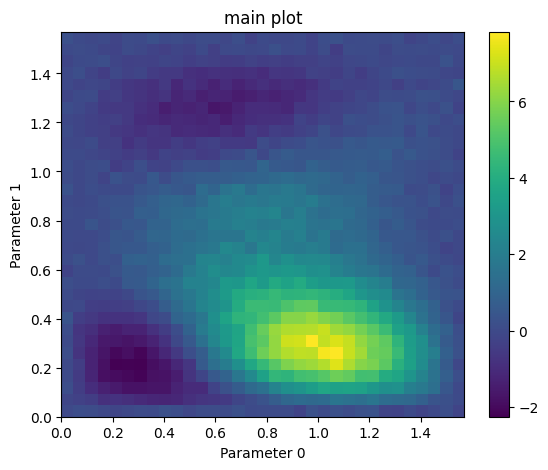

 
Running reference.
Point 1089 out of 1089. Expected remaining time to complete: 00:00:00, it will be finished at 08:16:47. 
Plotting the reference plot with the following parameters:
	Parameter 0: 0 to 1.57
	Parameter 1: 0 to 1.57


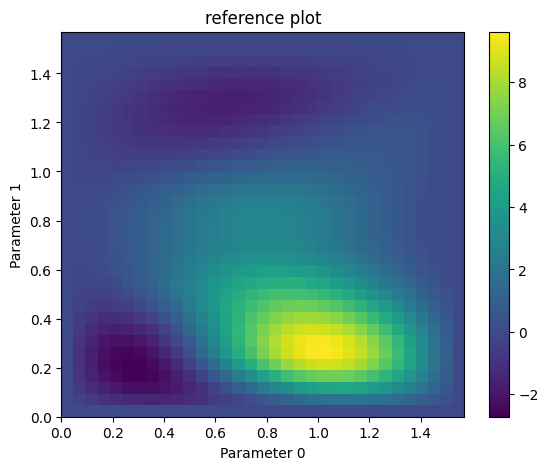

In [35]:
# to run the benchmark, call the run method passing the number of points per axis and the range of the parameters to sweep
benchmark.run(n_points_axis=2**5+1, ranges=[(0, 3.14/2), (0, 3.14/2)], plot=True, plot_every=100)
# this also runs the reference to which is going to be compared, the reference is a QAOA object using the analytical simulator

After running we can plot the results and get the mean difference between the benchmarked and the reference:

In [19]:
benchmark.difference_mean

-0.30823779045631433

Plotting the main plot with the following parameters:
	Parameter 0: 0 to 1.57
	Parameter 1: 0 to 1.57
Plotting the reference plot with the following parameters:
	Parameter 0: 0 to 1.57
	Parameter 1: 0 to 1.57
Plotting the difference plot with the following parameters:
	Parameter 0: 0 to 1.57
	Parameter 1: 0 to 1.57


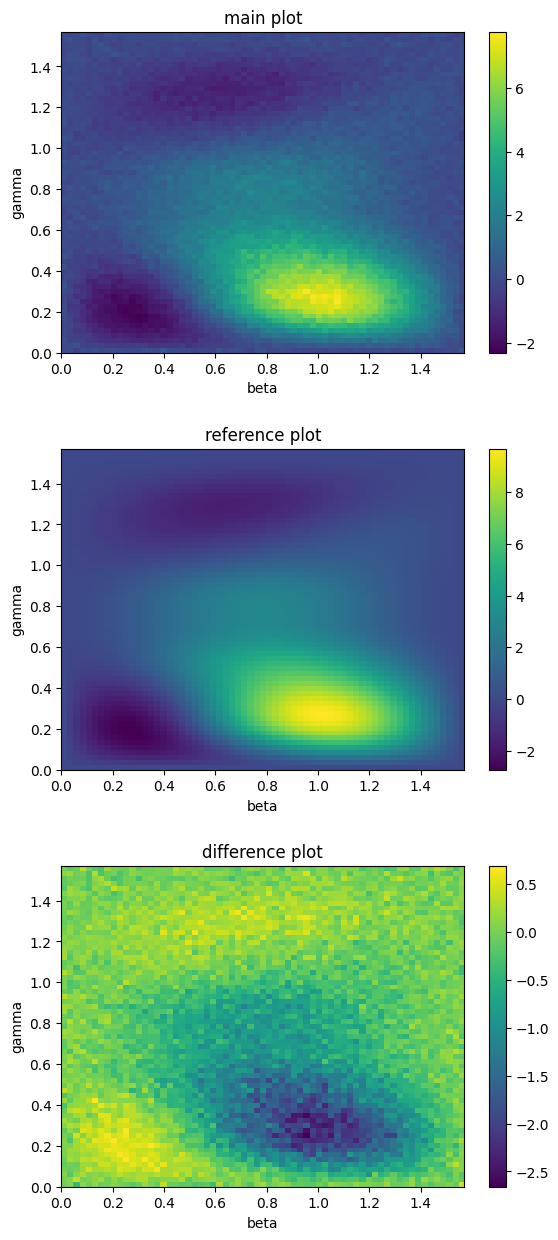

In [20]:
benchmark.plot(main=True, reference=True, difference=True, labels=['beta', 'gamma'])

One can also run the benchmark fixing the value of any parameter:

In [37]:
benchmark.run(n_points_axis=100, ranges=[(0, 3.14/2), (1,)])

Running benchmark.
Point 100 out of 100. Expected remaining time to complete: 00:00:00, it will be finished at 08:19:57. 
Running reference.
Point 100 out of 100. Expected remaining time to complete: 00:00:00, it will be finished at 08:19:58. 


Plotting the main plot with the following parameters:
	Parameter 0: 0 to 1.57
	Parameter 1: 1
Plotting the reference plot with the following parameters:
	Parameter 0: 0 to 1.57
	Parameter 1: 1
Plotting the difference plot with the following parameters:
	Parameter 0: 0 to 1.57
	Parameter 1: 1


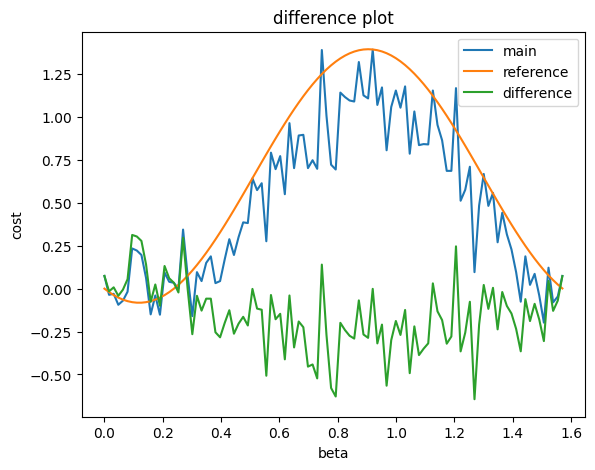

In [38]:
benchmark.plot(main=True, reference=True, difference=True, labels=['beta', 'cost'], one_plot=True)

## Benchmark with different circuit properties

In [39]:
from openqaoa import QAOA, create_device

# create the QAOA object
q2 = QAOA()

# set device and backend properties
q2.set_device(qiskit_cloud)
q2.set_backend_properties(n_shots=1000)

# set properties
q2.set_circuit_properties(p=2, param_type='extended')

# compile with the problem
q2.compile(MaximumCut.random_instance(n_nodes=3, edge_probability=0.9, seed=10).qubo) #use a smaller problem to speed up the example

In [40]:
# create the new QAOABenchmark object, in this case the reference will use the vectorized simulator not the analytical one
benchmark2 = QAOABenchmark(q2)

In [45]:
benchmark2.run(n_points_axis=2**5+1, ranges=[(1,), (1,), (1,), (0, 3.14), (1,), (1,), (-3.14, 3.14), (1,), (1,), (1,), (1,), (1,)]) 

Running benchmark.
Point 1089 out of 1089. Expected remaining time to complete: 00:00:00, it will be finished at 08:28:02. 
Running reference.
Point 1089 out of 1089. Expected remaining time to complete: 00:00:00, it will be finished at 08:28:02. 


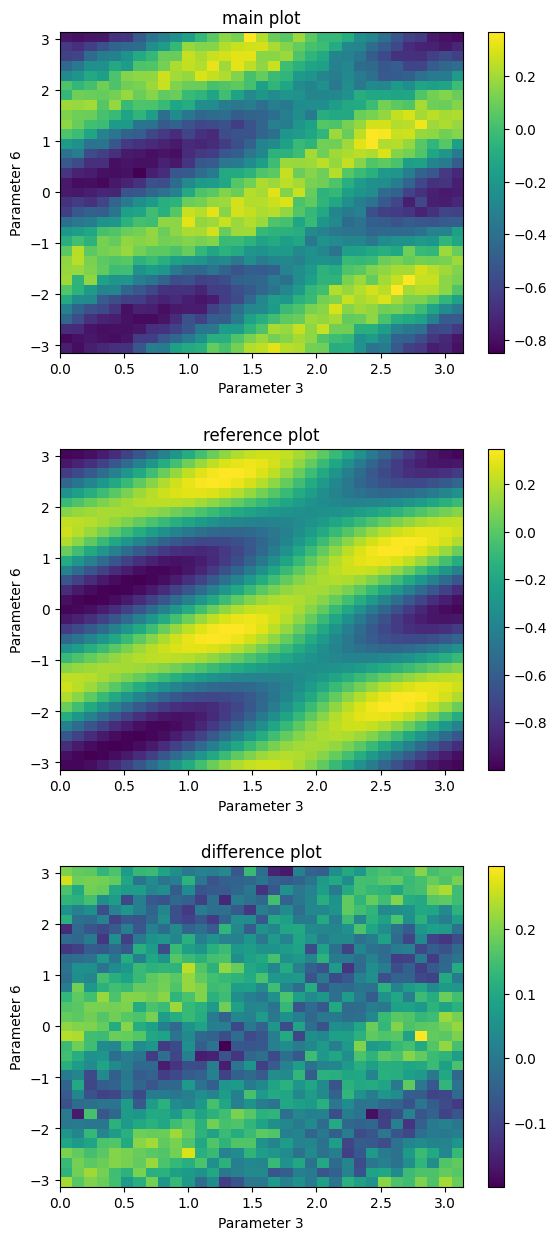

In [48]:
benchmark2.plot(main=True, reference=True, difference=True, verbose=False) 